#**Buissness understanding**

The problem of classifying yoga pose images into different categories automatically is an image recognition task that falls under the realm of machine learning. The objective is to develop a system that can distinguish between various poses performed by individuals in images.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Model
 
import cv2
import gc
import os
 
import tensorflow as tf
from tensorflow import keras
from keras import layers
 
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.utils import shuffle           
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Kaggle Installation
!pip install -q kaggle
#Create Kaggle Folder
!mkdir ~/.kaggle/
# copy kaggle.json in ~/.kaggle/
!cp '/content/drive/MyDrive/kaggle.json' ~/.kaggle/
!chmod 600  ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download -d niharika41298/yoga-poses-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.9/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


#**Data Requirement**

To develop a yoga pose classification system, data requirements may include a large and diverse dataset of yoga pose images with corresponding labels

In [ ]:
pip install rarfile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rarfile import RarFile
 
data_path = '/content/YOGA.rar'
 
with RarFile(data_path, 'r') as rar:
    rar.extractall()
    print('The dataset has been extracted.')

The dataset has been extracted.


#**Data preperation**

In [ ]:
class_names = ['downdog', 'goddess', 'plank', 'tree', 'warrior2']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

IMAGE_SIZE = (150,150)

In [ ]:
def load_data():
   
    datasets = ['/content/YOGA/content/cleaned/DATASET/TRAIN', '/content/YOGA/content/cleaned/DATASET/TEST'] 
    output = []
    
    # Iterate through the training and test set.
    for dataset in datasets:
        
        images = [] 
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each Subfolder corresponding to a category  
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Image path should be obtained
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv.imread(img_path)
                image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
                image = cv.resize(image, IMAGE_SIZE) 
                
                # Append the image along with its label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')
        
        # Shuffle the images to introduce some randomness in our data
        images, labels = shuffle(images, labels)
        
        
        output.append((images, labels))

    return output

In [ ]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading /content/YOGA/content/cleaned/DATASET/TRAIN


100%|██████████| 160/160 [00:03<00:00, 48.09it/s]


Loading /content/YOGA/content/cleaned/DATASET/TEST


100%|██████████| 69/69 [00:03<00:00, 22.02it/s]


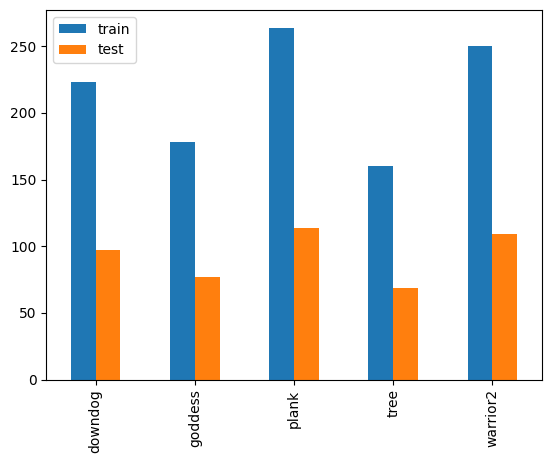

In [ ]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,'test': test_counts}, index=class_names).plot.bar()
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

#**Modeling**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 72, 72, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                    

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size = 28, epochs=15, validation_split = 0.3)

Epoch 1/15
27/27 [==============================] - 14s 63ms/step - loss: 1.6227 - accuracy: 0.2261 - val_loss: 1.6020 - val_accuracy: 0.2012
Epoch 2/15
27/27 [==============================] - 1s 25ms/step - loss: 1.5881 - accuracy: 0.2274 - val_loss: 1.5849 - val_accuracy: 0.2941
Epoch 3/15
27/27 [==============================] - 1s 25ms/step - loss: 1.5509 - accuracy: 0.3072 - val_loss: 1.4590 - val_accuracy: 0.3437
Epoch 4/15
27/27 [==============================] - 1s 25ms/step - loss: 1.4117 - accuracy: 0.4202 - val_loss: 1.3481 - val_accuracy: 0.4396
Epoch 5/15
27/27 [==============================] - 1s 26ms/step - loss: 1.2167 - accuracy: 0.5027 - val_loss: 1.1557 - val_accuracy: 0.5573
Epoch 6/15
27/27 [==============================] - 1s 27ms/step - loss: 1.0756 - accuracy: 0.5758 - val_loss: 1.0637 - val_accuracy: 0.6006
Epoch 7/15
27/27 [==============================] - 1s 29ms/step - loss: 1.0371 - accuracy: 0.5878 - val_loss: 1.0221 - val_accuracy: 0.6130
Epoch 8/15
2

#**Visualization of the process of CNN model**

In [ ]:
layer_weights = []
for layer in model.layers:
    weights = layer.get_weights()
    layer_weights.append(weights)

In [ ]:
from PIL import Image

In [ ]:
img1 = Image.open('/content/YOGA/content/cleaned/DATASET/TEST/downdog/00000000.jpg')
resized_img = img1.resize((150, 150))

# Convert the image to a numpy array
img_array = np.array(resized_img)
img_array = np.expand_dims(img_array, axis=0)

# Define the activation model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Generate the activations for the image
activations = activation_model.predict(img_array)

1/1 [==============================] - 0s 183ms/step


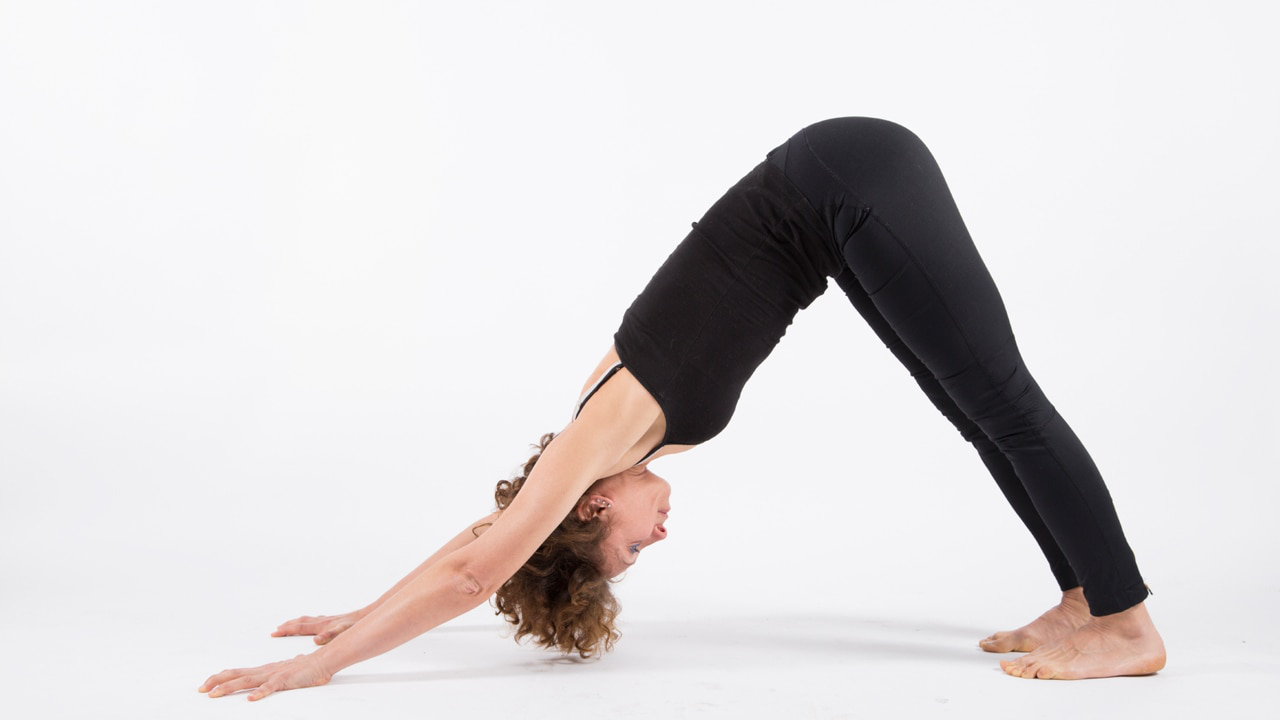

In [ ]:
img1

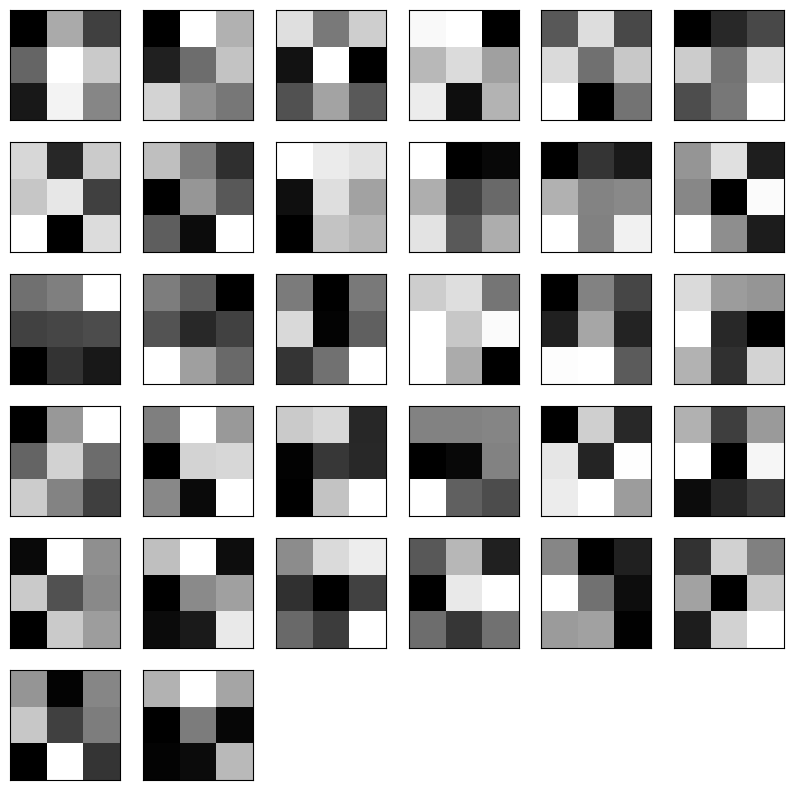

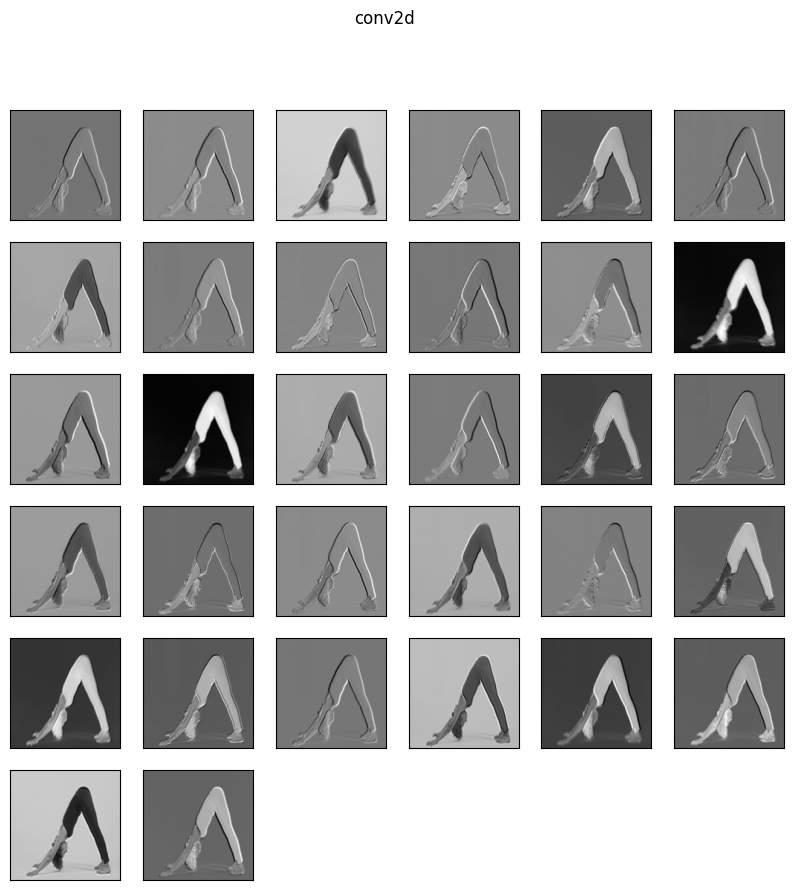

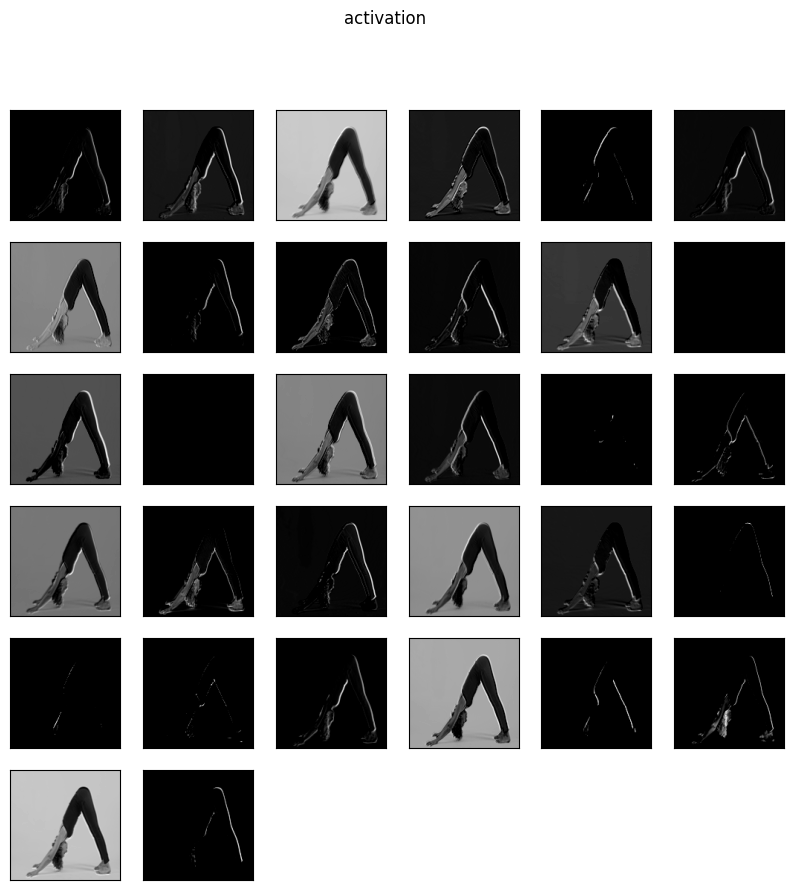

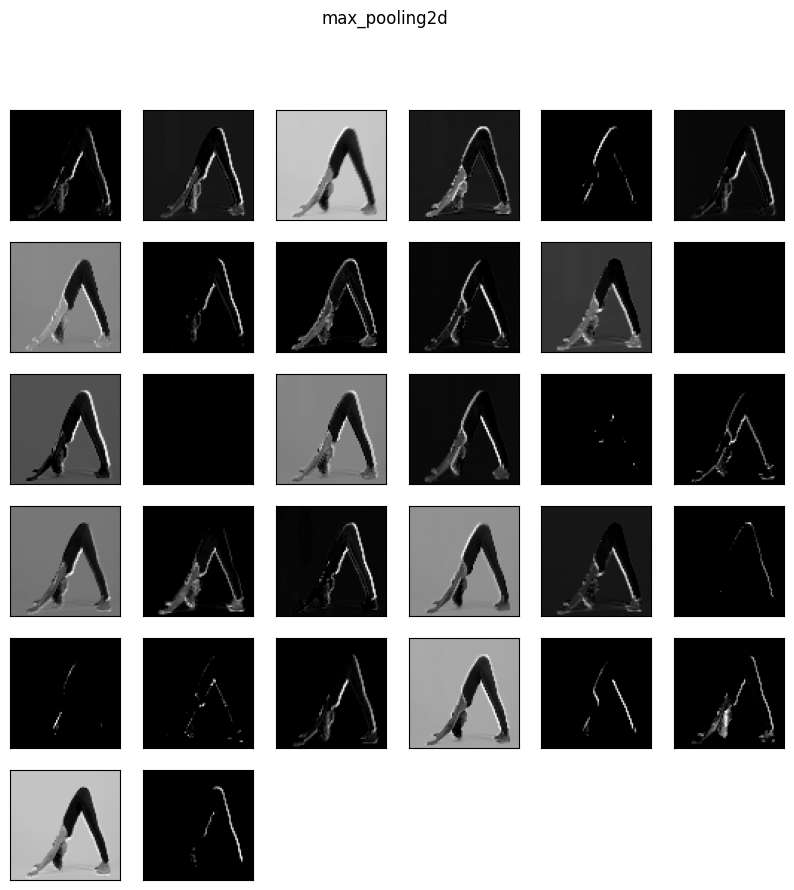

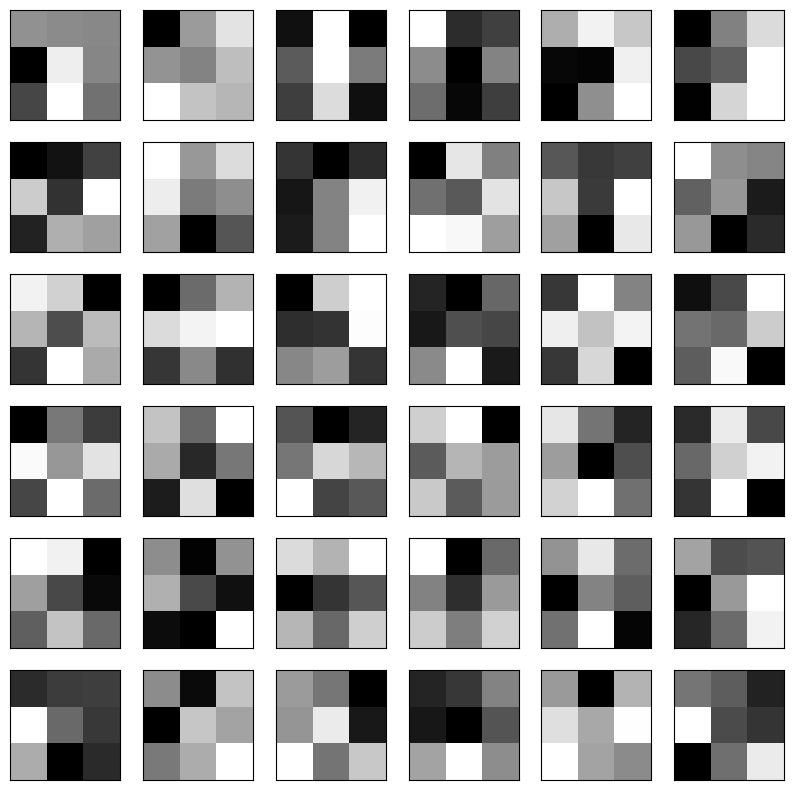

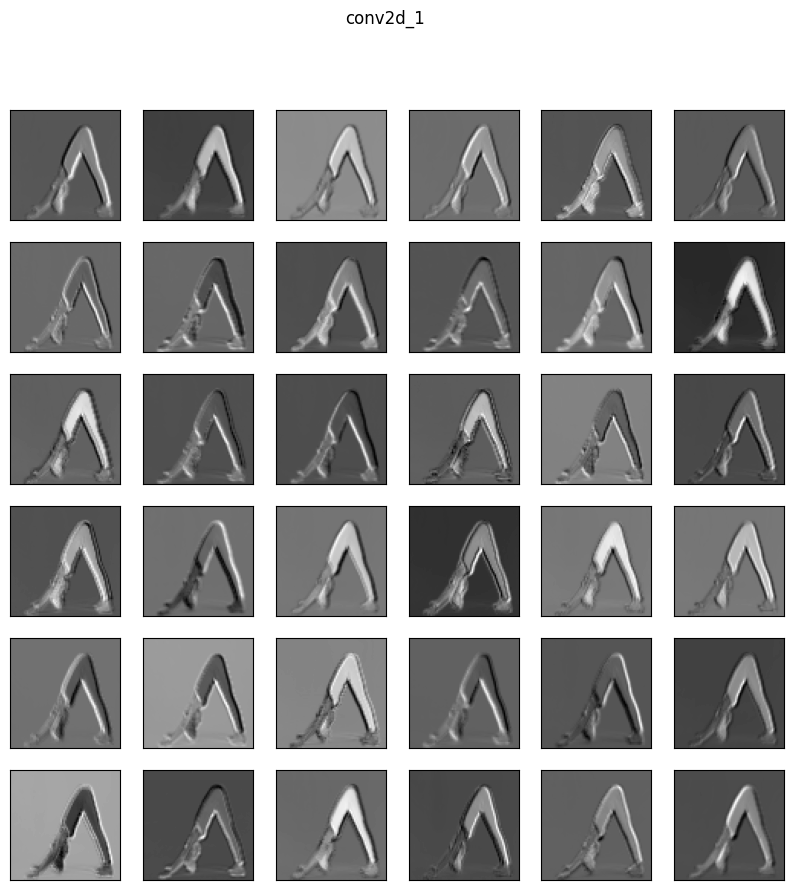

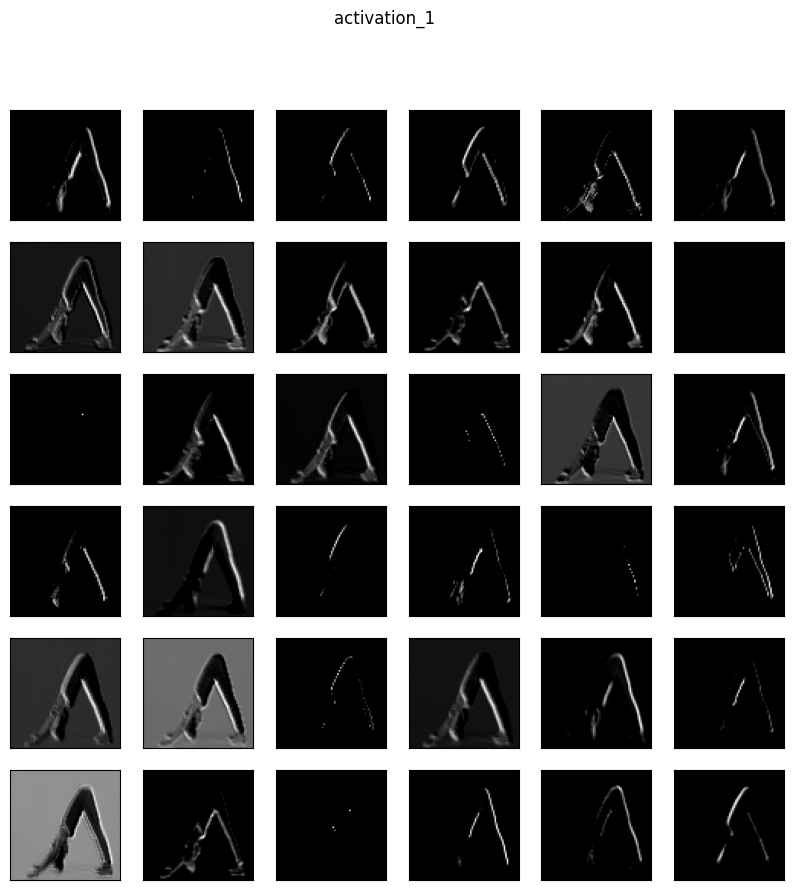

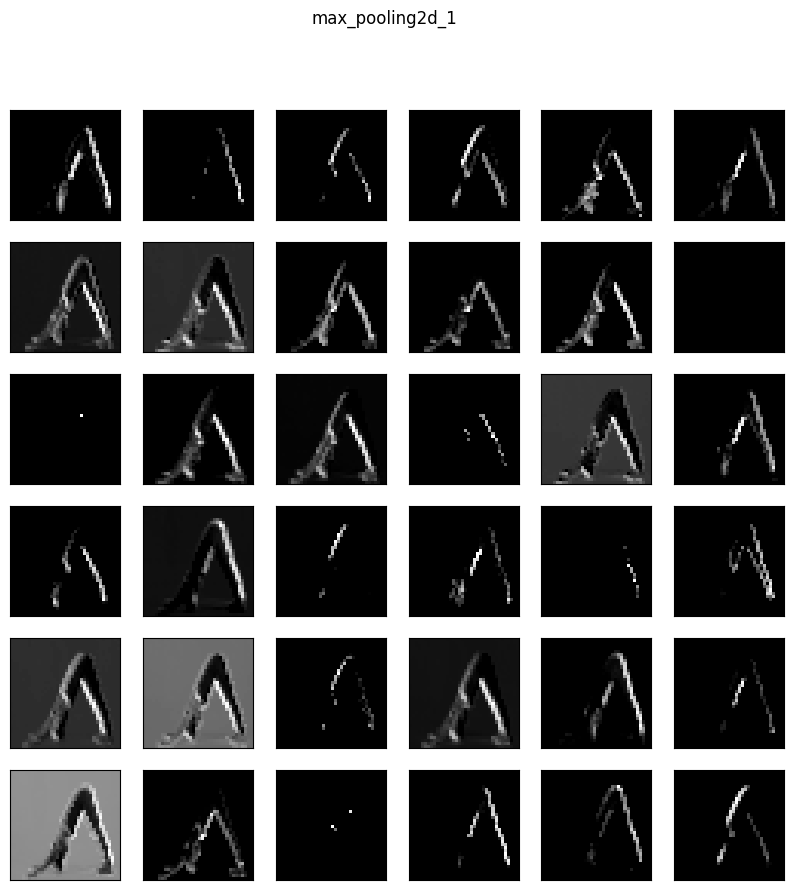

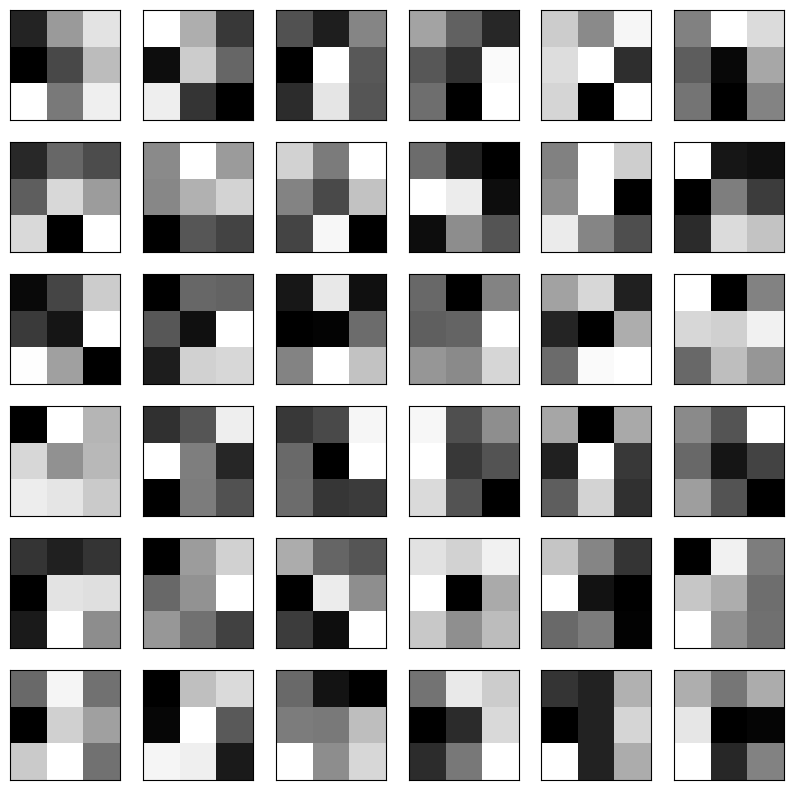

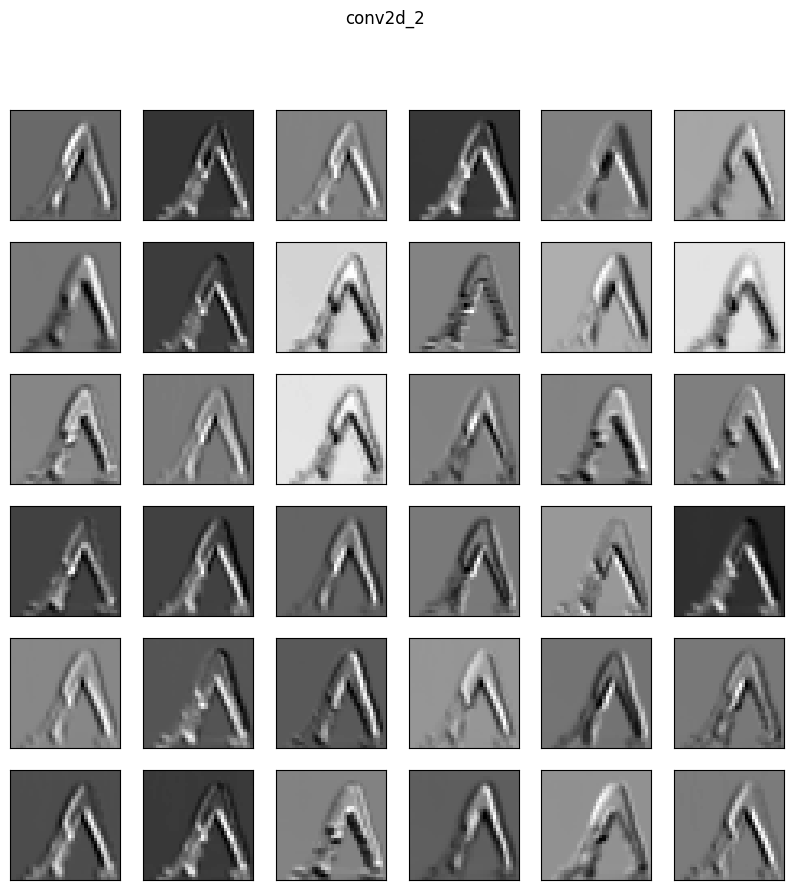

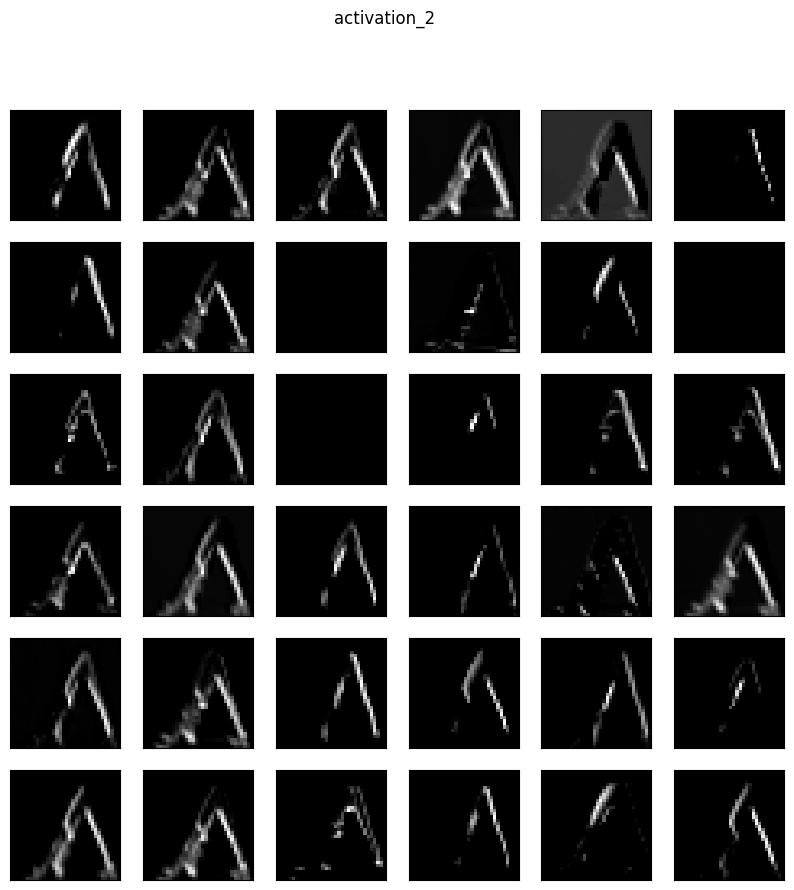

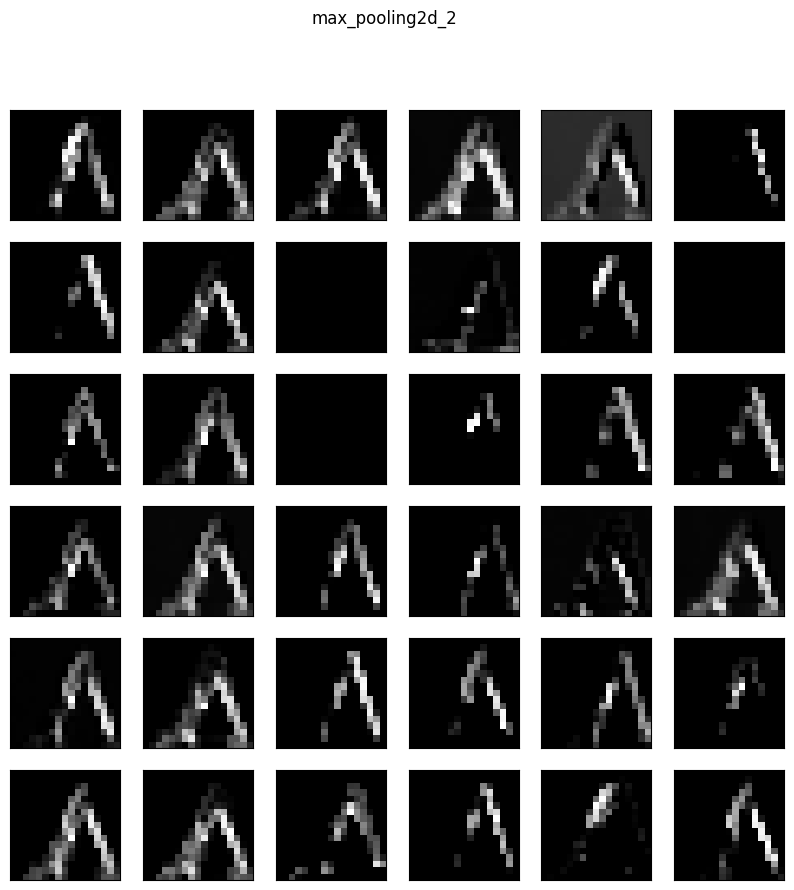

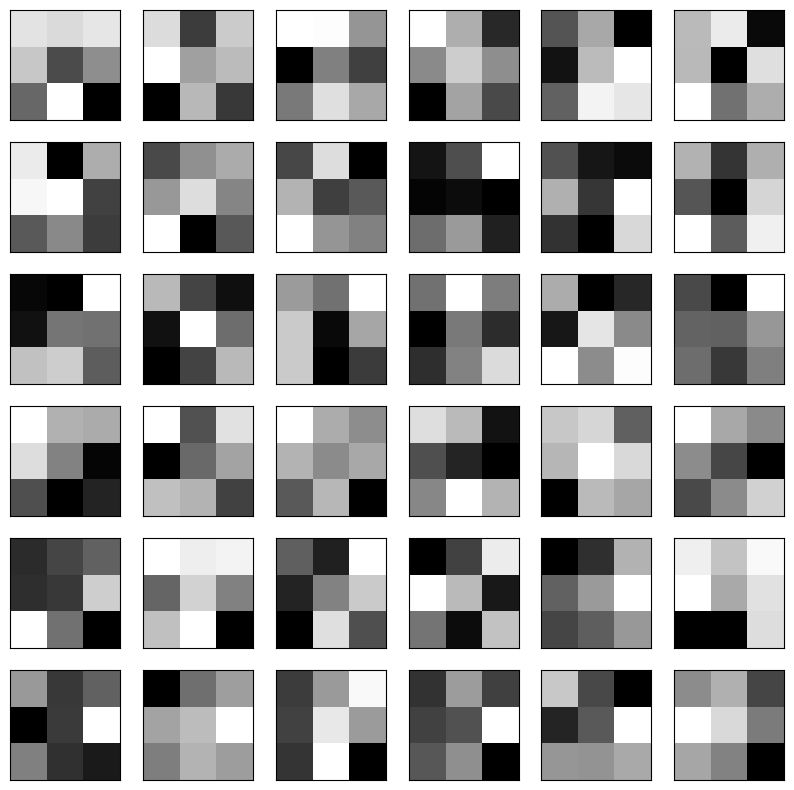

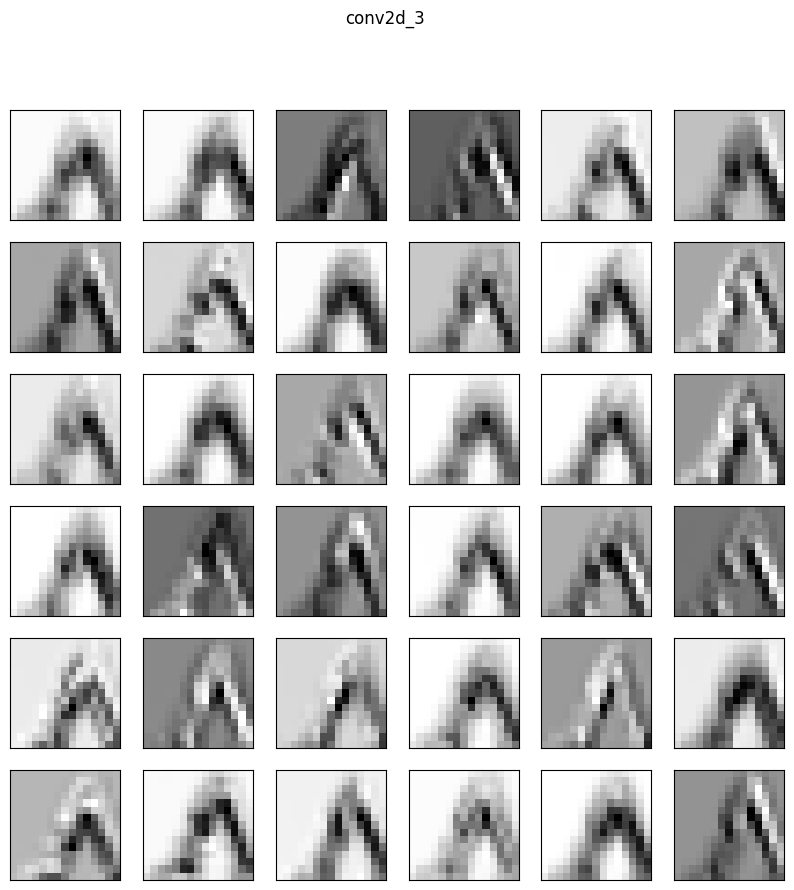

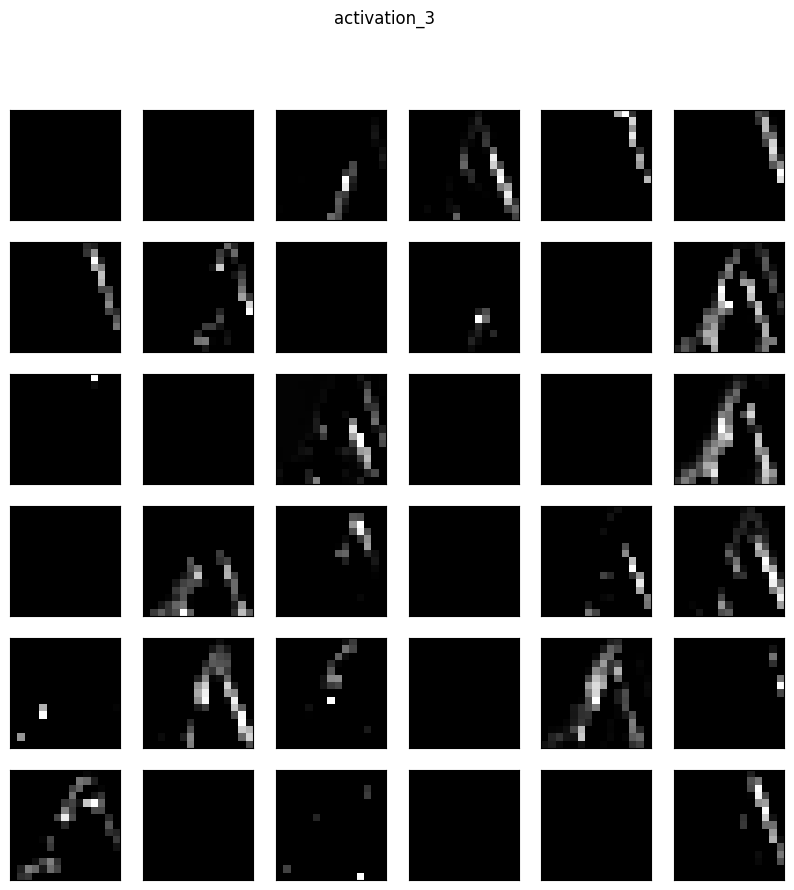

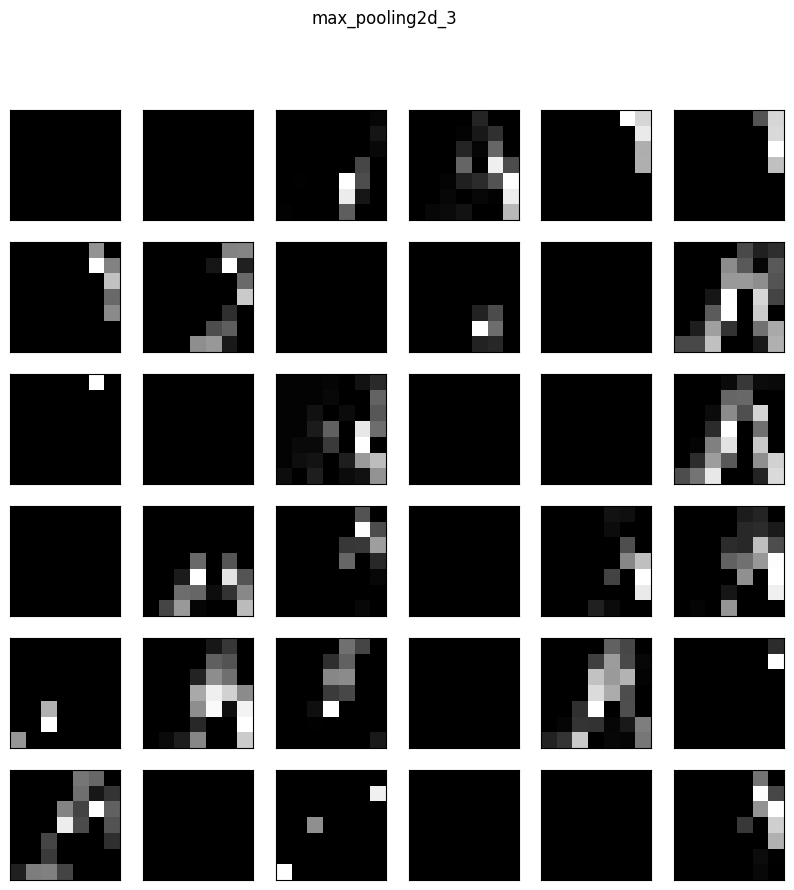

IndexError: ignored

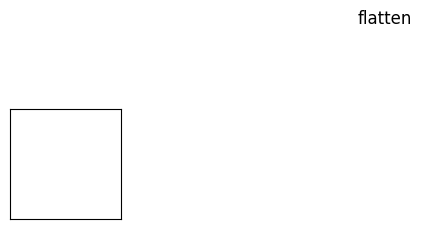

In [ ]:
for i in range(len(model.layers)):
    if 'conv2d' in model.layers[i].name:
        plt.figure(figsize=(10, 10))
        filters, biases = layer_weights[i]
        f_min, f_max = filters.min(), filters.max()
        filters = (filters - f_min) / (f_max - f_min)
        n_filters = min(filters.shape[3], 36)
        for j in range(n_filters):
            plt.subplot(6, 6, j+1)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(filters[:, :, 0, j], cmap='gray')
        plt.show()

    if isinstance(layer, keras.layers.Conv2D) and i < len(model.layers) - 1:
        plt.figure(figsize=(10, 10))
        plt.suptitle(model.layers[i].name)
        if len(activations[i].shape) > 3:
          n_activations = min(activations[i].shape[3], 36)
        else:
          n_activations = 1
        #n_activations = min(activations[i].shape[3], 36)
        for j in range(n_activations):
            plt.subplot(6, 6, j+1)
            plt.xticks([])
            plt.yticks([])
            plt.imshow(activations[i][0, :, :, j], cmap='gray')
        plt.show()






#**Model Evaluation**

### To visualize how our model is performing, we plot the accuracy and the loss during the training

In [ ]:
def plot_performance(history):

    fig = plt.figure(figsize=(15,8))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("Training_accuracy vs Validation_accuracy")
    plt.ylabel("ACCURACY")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss_function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("Training_loss vs Validation_loss")
    plt.ylabel("LOSS")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

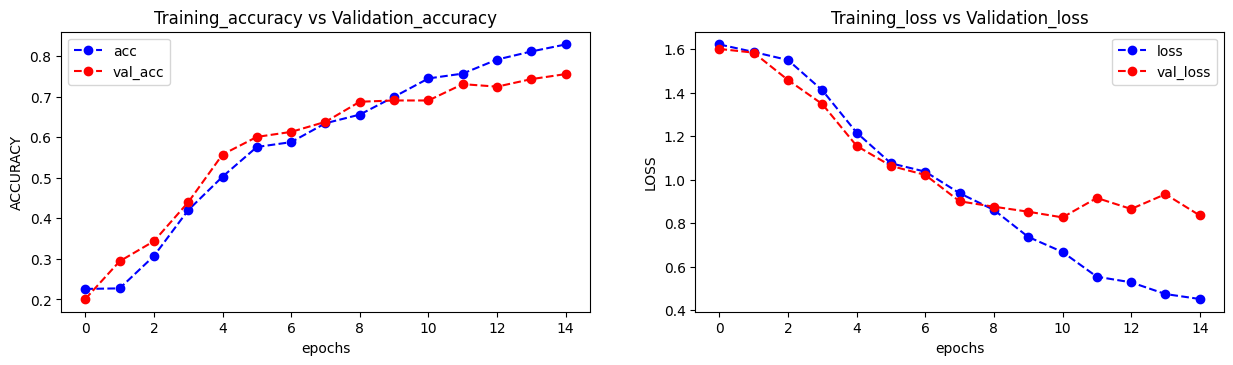

In [ ]:
plot_performance(history)

The model is not perfect as we can clearly observe the Validation loss slightly flattening though the training loss is going down and the accuracy of the model is improving.
Reason could be insufficient training data and hence it could be improved by adding more training data.

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

15/15 [==============================] - 1s 28ms/step - loss: 0.5132 - accuracy: 0.8584


We now make predictions on the test data set.

In [ ]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions,axis=1)  # np.argmax is used since each prediction would be an array of...
                                             # probabilities and we need to pick the max value. 
pred_labels

15/15 [==============================] - 0s 11ms/step


array([0, 4, 2, 1, 3, 1, 4, 0, 4, 0, 0, 4, 3, 2, 4, 2, 1, 1, 2, 3, 4, 4,
       0, 1, 0, 0, 1, 1, 3, 4, 0, 2, 1, 4, 4, 4, 3, 4, 0, 2, 1, 0, 2, 2,
       2, 4, 3, 4, 0, 0, 1, 2, 3, 2, 2, 3, 4, 2, 0, 3, 1, 0, 4, 2, 4, 2,
       2, 0, 3, 3, 2, 4, 3, 0, 0, 1, 2, 1, 0, 1, 1, 4, 0, 3, 1, 0, 2, 4,
       2, 0, 4, 4, 3, 4, 0, 4, 4, 4, 3, 1, 2, 3, 0, 1, 4, 4, 3, 2, 0, 0,
       4, 0, 1, 2, 2, 2, 2, 0, 2, 4, 2, 1, 0, 2, 3, 2, 4, 0, 1, 0, 4, 4,
       0, 4, 0, 1, 4, 1, 0, 0, 0, 3, 1, 0, 1, 0, 4, 2, 4, 0, 3, 0, 2, 2,
       0, 4, 4, 4, 0, 4, 0, 3, 0, 2, 0, 2, 2, 4, 1, 4, 4, 3, 3, 2, 4, 2,
       3, 2, 1, 1, 4, 2, 1, 4, 0, 1, 3, 1, 2, 4, 4, 4, 4, 2, 0, 2, 2, 0,
       2, 4, 4, 1, 4, 2, 4, 4, 2, 4, 3, 2, 3, 3, 3, 3, 4, 2, 2, 2, 4, 2,
       2, 2, 3, 3, 0, 2, 4, 3, 2, 4, 3, 3, 1, 4, 4, 4, 2, 2, 0, 2, 3, 1,
       3, 0, 1, 4, 3, 0, 2, 3, 1, 4, 1, 0, 0, 0, 0, 4, 0, 0, 2, 2, 4, 4,
       0, 0, 3, 1, 4, 0, 1, 4, 4, 3, 3, 0, 1, 1, 3, 0, 3, 3, 2, 4, 1, 2,
       4, 4, 4, 3, 0, 4, 2, 1, 2, 1, 1, 4, 0, 1, 1,

Plotting the images along with their actual class and predicted class would give us a proper idea about how our model is making predictions.

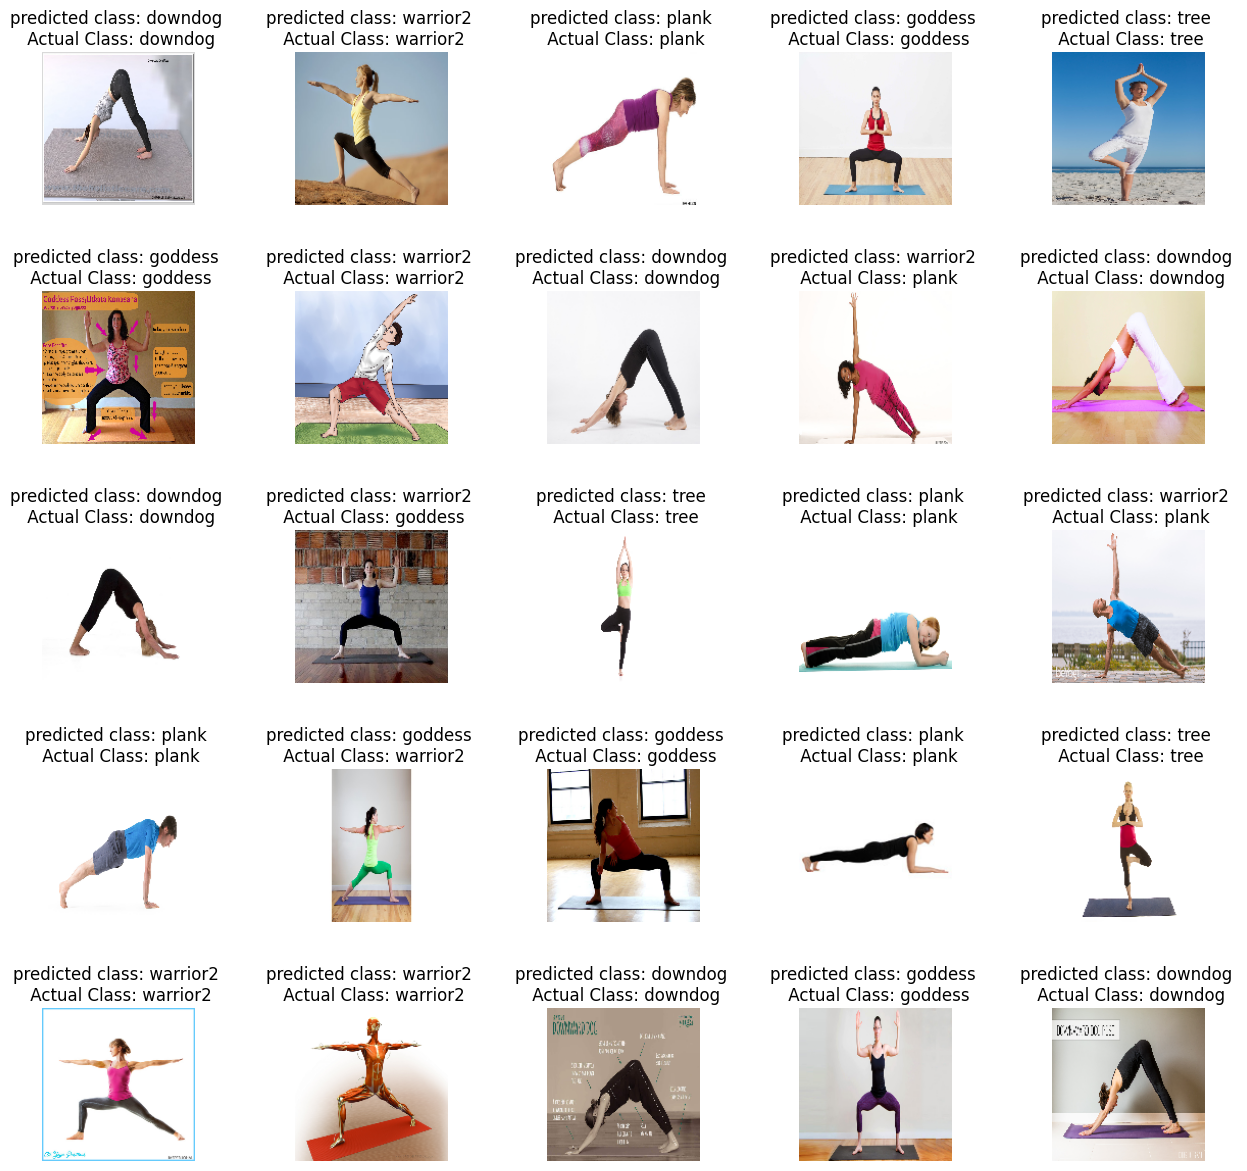

In [ ]:
fig, ax = plt.subplots(5,5, figsize = (15,15))
ax = ax.ravel()

for i in range(0,25):  
    ax[i].imshow(test_images[i])
    ax[i].set_title(f"predicted class: {class_names[pred_labels[i]]} \n Actual Class: {class_names[test_labels[i]]}")
    ax[i].axis('off')
plt.subplots_adjust(wspace=0.65)